# **Purpose of this Analysis**

The total costs for wireless data usage are very high at our company. We need to look at how we can cut costs.  We will need to look at Total Cost, Carrier type, and Headcount if we are to determine what the root cause is, if we are to hope to save any money in the future on wireless data costs.

# **Hypothesis**

**Our Verizon devices cost more than our AT&T devices. We should only offer AT&T because it will save us money.**

* H1o: There is no significant difference between the total cost of Verizon or AT&T across our staff.

* H1a: Verizon devices do show a significant difference in total cost compared to AT&T.


**Our staff that text on their phones tend to use Verizon.**

* H1o: There is no relationship between high text counts and choosing Verizon

* H1a: There is a significant relationship between text counts and being on Verizon


#**The Data**

The data set will consist of wireless data costs at Company A in January 2020.
The following columns may be of use for the comparisons:

* Year
*Month
*Carrier
*Total Cost
*Number of  SMS

I will drop all columns that will not be used in this analysis, although they are important they were not mentioned in either hypothesis to be considered for the analysis.




In [ ]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from numpy import inf

In [ ]:
capstone = pd.read_csv('https://raw.githubusercontent.com/r4geqwit/WirelessData/master/RawDataJanuary.csv')
capstone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   583 non-null    int64  
 1   Month                                  583 non-null    object 
 2   Employee Number                        581 non-null    float64
 3   Total Cost                             583 non-null    float64
 4   Other Cost                             583 non-null    float64
 5   Cost of International                  583 non-null    float64
 6   Cost of DATA                           583 non-null    float64
 7   Cost of Roaming data                   583 non-null    int64  
 8   Cost of SMS                            583 non-null    float64
 9   Cost of Roaming                        583 non-null    int64  
 10  Cost of Services                       583 non-null    float64
 11  Cost o

In [ ]:
capstone.Carrier.unique()

array(['ATT US', 'Verizon US'], dtype=object)

In [ ]:
capstone.rename(columns = { 'Carrier':'Wireless Provider'}, inplace = True)
capstone.dropna(subset=['Total Cost','Wireless Provider'])
capstone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   583 non-null    int64  
 1   Month                                  583 non-null    object 
 2   Employee Number                        581 non-null    float64
 3   Total Cost                             583 non-null    float64
 4   Other Cost                             583 non-null    float64
 5   Cost of International                  583 non-null    float64
 6   Cost of DATA                           583 non-null    float64
 7   Cost of Roaming data                   583 non-null    int64  
 8   Cost of SMS                            583 non-null    float64
 9   Cost of Roaming                        583 non-null    int64  
 10  Cost of Services                       583 non-null    float64
 11  Cost o

In [ ]:
JanuarytotalCosts = capstone.drop(columns=['Number of SMS','Other Cost','Cost of International','Cost of DATA', 'Cost of Roaming data','Cost of SMS','Cost of Roaming','Cost of Services','Cost of Other Mobile Networks','Cost of Landline','Plans','Features','Tax','Discount','Other','Duration of International','Duration of On net','Duration of Roaming','Duration of Services','Duration of Other Mobile Networks','Duration of Landline','Number of International Calls','Number of On net Calls','Number of Roaming Calls','Number of Services Calls','Number of Other Mobile Networks calls','Number of Landline Calls','Volume of DATA','Volume of Roaming data','Plans_1'])
JanuarytotalSMS = capstone.drop(columns=['Total Cost','Other Cost','Cost of International','Cost of DATA', 'Cost of Roaming data','Cost of SMS','Cost of Roaming','Cost of Services','Cost of Other Mobile Networks','Cost of Landline','Plans','Features','Tax','Discount','Other','Duration of International','Duration of On net','Duration of Roaming','Duration of Services','Duration of Other Mobile Networks','Duration of Landline','Number of International Calls','Number of On net Calls','Number of Roaming Calls','Number of Services Calls','Number of Other Mobile Networks calls','Number of Landline Calls','Volume of DATA','Volume of Roaming data','Plans_1'])
JanuarytotalSMS.rename(columns = { 'Number of SMS':'Text Messages'}, inplace = True)

In [ ]:
JanuarytotalCosts.info()
JanuarytotalCosts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               583 non-null    int64  
 1   Month              583 non-null    object 
 2   Employee Number    581 non-null    float64
 3   Total Cost         583 non-null    float64
 4   Wireless Provider  583 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 22.9+ KB


,Year,Month,Employee Number,Total Cost,Wireless Provider
0,2020,January,372337.0,71.00,ATT US
1,2020,January,376727.0,228.77,ATT US
2,2020,January,357472.0,259.16,Verizon US
3,2020,January,372780.0,87.11,ATT US
4,2020,January,359372.0,67.17,ATT US


In [ ]:
JanuarytotalSMS.info()
JanuarytotalSMS.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               583 non-null    int64  
 1   Month              583 non-null    object 
 2   Employee Number    581 non-null    float64
 3   Text Messages      583 non-null    int64  
 4   Wireless Provider  583 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 22.9+ KB


,Year,Month,Employee Number,Text Messages,Wireless Provider
0,2020,January,372337.0,813,ATT US
1,2020,January,376727.0,46,ATT US
2,2020,January,357472.0,153,Verizon US
3,2020,January,372780.0,366,ATT US
4,2020,January,359372.0,28,ATT US


# ***Our Verizon devices cost more than our AT&T devices. We should only offer AT&T because it will save us money.***

First I sorted all of the data based on Total Cost to provide a hint as to what range we will be working on.  At the looks of it, thise Total Cost range is very wide. 

To begin I will split the cleaned data frame containing both wireless carriers into two so that I can clearly define which carrier I will be working on.   With both Wireless Providers separated, I plot the histogram based on Total Cost and distinguished by color, red for Verizon and light blue for ATT.  I then conduct the stats test to get a closer look at the variance, skewness, and kurtosis of both data sets.

In [ ]:
JanuarytotalCosts.sort_values(by=['Total Cost'])

,Year,Month,Employee Number,Total Cost,Wireless Provider
485,2020,January,310061.0,-72.67,Verizon US
185,2020,January,352490.0,-38.56,Verizon US
96,2020,January,371874.0,-22.06,Verizon US
458,2020,January,263152.0,-19.95,Verizon US
218,2020,January,341705.0,-5.12,Verizon US
...,...,...,...,...,...
140,2020,January,345032.0,886.72,Verizon US
308,2020,January,357621.0,1067.39,ATT US
169,2020,January,344461.0,1404.44,Verizon US
558,2020,January,371934.0,1960.39,Verizon US


In [ ]:
verizonTotalCosts = JanuarytotalCosts[(JanuarytotalCosts['Wireless Provider']=='Verizon US')]  #Verizon only devices
attTotalCosts = JanuarytotalCosts[(JanuarytotalCosts['Wireless Provider']=='ATT US')]          #ATT only devices
verizonTotalCosts.info()
attTotalCosts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 2 to 580
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               285 non-null    int64  
 1   Month              285 non-null    object 
 2   Employee Number    285 non-null    float64
 3   Total Cost         285 non-null    float64
 4   Wireless Provider  285 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 13.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 582
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               298 non-null    int64  
 1   Month              298 non-null    object 
 2   Employee Number    296 non-null    float64
 3   Total Cost         298 non-null    float64
 4   Wireless Provider  298 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 14.

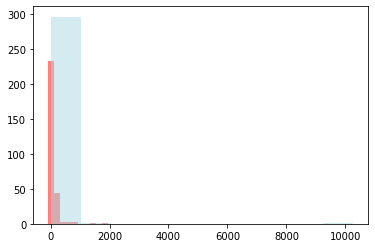

DescribeResult(nobs=285, minmax=(-72.67, 1960.39), mean=115.91459649122805, variance=27183.803060840128, skewness=7.477950064797655, kurtosis=68.93740123328047)
DescribeResult(nobs=298, minmax=(-0.13, 10251.84), mean=143.61976510067115, variance=353977.2878851299, skewness=16.554108993582126, kurtosis=278.50393727773144)


In [ ]:
plt.hist(verizonTotalCosts['Total Cost'], alpha = .5,color='red')    #Plotting total costs of verizon devices then att
plt.hist(attTotalCosts['Total Cost'], alpha = .5,color='lightblue')
plt.show()

print(stats.describe(verizonTotalCosts['Total Cost']))
print(stats.describe(attTotalCosts['Total Cost']))

# *Log test utilized in order to get data set to be as close to normally distributed as possible*

The above data so far is not looking good, but I will utilize Log() and Abs() to ascertain a more accurate reading of the data set.

In [ ]:
verizonTotalCosts['Log']=np.log(abs(verizonTotalCosts['Total Cost']))
attTotalCosts['Log']=np.log(abs(attTotalCosts['Total Cost']))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


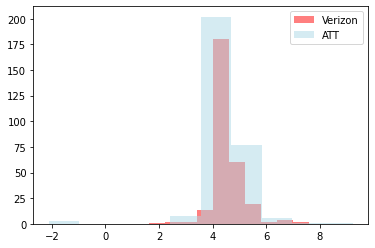

DescribeResult(nobs=285, minmax=(1.6331544390514163, 7.580898712022586), mean=4.501151257850442, variance=0.35713615030004575, skewness=1.1646307147068844, kurtosis=6.977751794198717)
DescribeResult(nobs=298, minmax=(-2.120263536200091, 9.23521248065129), mean=4.463202440135679, variance=0.8377362843985918, skewness=-2.9967862195349992, kurtosis=26.899016742357325)


In [ ]:
plt.hist(verizonTotalCosts['Log'], alpha = .5,color='red', label="Verizon")    #Plotting total costs of verizon devices then att
plt.hist(attTotalCosts['Log'], alpha = .5,color='lightblue', label='ATT')
plt.legend()
plt.show()

print(stats.describe(verizonTotalCosts['Log']))
print(stats.describe(attTotalCosts['Log']))

Skewness is acceptable, however kurtosis score of ATT is outside the acceptable range with a value of 26.89, so we will conduct the Kruskal Willis test instead of a T-test

In [ ]:
stats.kruskal(verizonTotalCosts['Log'],attTotalCosts['Log'])

KruskalResult(statistic=0.0019417007893993306, pvalue=0.9648528035940374)

P-value = *0.9061340224257943*

# **Results?**

These data sets are not normally distributed at all visually, based on the histogram.  The stats test for each also show that the variance is very different for each population for Verizon and ATT.The Skewness for both are far from the accepted range os -3 to 3, and the Kurtosis scores of 68 and 278 are not close to zero.  

After using the Log() and Abs() functions the data is still not adequete to complete a t-test with the kurtosis scores not fitting within our desired range, so the t-test is not used.

The Kruskal test is used and gives us a P-value of 0.9061340224257943 which means we accept the null hypothesis.

* H1o: There is no significant difference between the total cost of Verizon or AT&T across our staff.

# **Our staff that text more tend to use Verizon over ATT.**

To begin I will split the cleaned data frame containing both wireless carriers into two so that I can clearly define which carrier I will be working on.   With both Wireless Providers separated, I plot the histogram based on Text Messages and distinguished by color, red for Verizon and light blue for ATT.  I then conduct the stats test to get a closer look at the variance, skewness, and kurtosis of both data sets.

In [ ]:
JanuarytotalSMS.sort_values(by=['Text Messages'])  

,Year,Month,Employee Number,Text Messages,Wireless Provider
394,2020,January,17431.0,0,Verizon US
333,2020,January,348859.0,0,ATT US
448,2020,January,348354.0,0,Verizon US
332,2020,January,330181.0,0,ATT US
410,2020,January,286003.0,0,ATT US
...,...,...,...,...,...
261,2020,January,380909.0,1324,Verizon US
436,2020,January,348865.0,1338,ATT US
113,2020,January,344454.0,1877,ATT US
460,2020,January,333768.0,2136,Verizon US


In [ ]:
verizonTotalSMS = JanuarytotalSMS[(JanuarytotalSMS['Wireless Provider']=='Verizon US')]  #Verizon only devices
attTotalSMS = JanuarytotalSMS[(JanuarytotalSMS['Wireless Provider']=='ATT US')]          #ATT only devices
verizonTotalSMS.info()
attTotalSMS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 2 to 580
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               285 non-null    int64  
 1   Month              285 non-null    object 
 2   Employee Number    285 non-null    float64
 3   Text Messages      285 non-null    int64  
 4   Wireless Provider  285 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 13.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 582
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               298 non-null    int64  
 1   Month              298 non-null    object 
 2   Employee Number    296 non-null    float64
 3   Text Messages      298 non-null    int64  
 4   Wireless Provider  298 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 14.

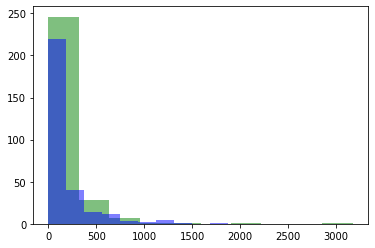

DescribeResult(nobs=285, minmax=(0, 3173), mean=161.16140350877194, variance=81119.07949098099, skewness=5.943787796721671, kurtosis=51.21187061586996)
DescribeResult(nobs=298, minmax=(0, 1877), mean=169.91610738255034, variance=70822.33300567194, skewness=2.888190335595449, kurtosis=10.18286893291184)


In [ ]:
plt.hist(verizonTotalSMS['Text Messages'], alpha = .5,color='green')    #Plotting total costs of verizon devices then att
plt.hist(attTotalSMS['Text Messages'], alpha = .5,color='blue')
plt.show()

print(stats.describe(verizonTotalSMS['Text Messages']))
print(stats.describe(attTotalSMS['Text Messages']))

# *Log test utilized in order to get data set to be as close to normally distributed as possible*

The above data is not normally distributed either, but I will utilize Log() to ascertain a more accurate reading of the data set.

In [ ]:
verizonTotalSMS['Log']=np.log(verizonTotalSMS['Text Messages'])
attTotalSMS['Log']=np.log(attTotalSMS['Text Messages'])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
verizonTotalSMS.sort_values(by=['Log'])  #I need to remove the -inf values..

,Year,Month,Employee Number,Text Messages,Wireless Provider,Log
298,2020,January,349893.0,0,Verizon US,-inf
371,2020,January,305741.0,0,Verizon US,-inf
549,2020,January,371174.0,0,Verizon US,-inf
548,2020,January,58957.0,0,Verizon US,-inf
423,2020,January,112112.0,0,Verizon US,-inf
...,...,...,...,...,...,...
421,2020,January,306248.0,826,Verizon US,6.716595
555,2020,January,243212.0,1002,Verizon US,6.909753
261,2020,January,380909.0,1324,Verizon US,7.188413
460,2020,January,333768.0,2136,Verizon US,7.666690


In [ ]:
verizonTotalSMS2 = verizonTotalSMS[verizonTotalSMS['Text Messages'] != 0]
attTotalSMS2 = attTotalSMS[attTotalSMS['Text Messages'] != 0]

The 0 values in Text Messages caused negative infinite values and so they were removed above into a new data frame.

In [ ]:
verizonTotalSMS2['Log']=np.log(verizonTotalSMS2['Text Messages'])
attTotalSMS2['Log']=np.log(attTotalSMS2['Text Messages'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


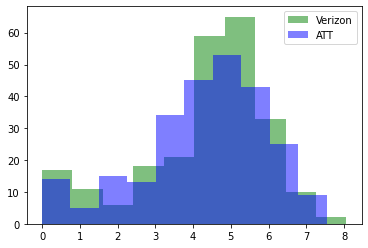

DescribeResult(nobs=242, minmax=(0.0, 8.062432791583195), mean=4.315196739611984, variance=2.8630117975662954, skewness=-0.9407501492991531, kurtosis=0.3972653160644497)
DescribeResult(nobs=256, minmax=(0.0, 7.537430036586509), mean=4.308436150420071, variance=2.8043678238755554, skewness=-0.7087109500760855, kurtosis=0.16213307347264516)


In [ ]:
plt.hist(verizonTotalSMS2['Log'], alpha = .5,color='green', label='Verizon')    
plt.hist(attTotalSMS2['Log'], alpha = .5,color='blue', label='ATT')
plt.legend()
plt.show()

print(stats.describe(verizonTotalSMS2['Log']))
print(stats.describe(attTotalSMS2['Log']))

These appear to be normally distributed, with the skewness and kurtosis scores being within acceptable range,  but let's double check with the Shapiro-Wilks test.

In [ ]:
print(stats.shapiro(verizonTotalSMS2['Log']))
print(stats.shapiro(attTotalSMS2['Log']))

(0.9173333644866943, 2.439820845356877e-10)
(0.9565837979316711, 6.008222612763348e-07)


Both W scores are close to 1, and P-values are indeed <.05, we will conduct the t-test.

In [ ]:
stats.ttest_ind(verizonTotalSMS2['Log'], attTotalSMS2['Log'])

Ttest_indResult(statistic=0.04480070190833625, pvalue=0.9642841961358175)

P-value is 0.9642841961358175

# **Results?**

These data sets were not normally distributed at all visually, based on the first histogram.  

Originally the Log() function ran into issues due to a zero value in Text Messages, which were removed to then remove the negative infitine values as a result. After using the Log() function the data was more normally distributed and I was able to complete a t-test with the kurtosis and skewness scores fitting within our desired range.

The t-test resulted in a P-value of 0.9642841961358175 which means we accept the null hypothesis again.

* H1o: There is no relationship between high text counts and choosing Verizon